## Import Library & Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("Airlines_Delay.csv", index_col="id")
df.head()

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
id,,,,,,,,
1,CO,269,SFO,IAH,3,15,205,1
2,US,1558,PHX,CLT,3,15,222,1
3,AA,2400,LAX,DFW,3,20,165,1
4,AA,2466,SFO,DFW,3,20,195,1
5,AS,108,ANC,SEA,3,30,202,0


## Exploratory Data Analysis

<AxesSubplot:xlabel='id'>

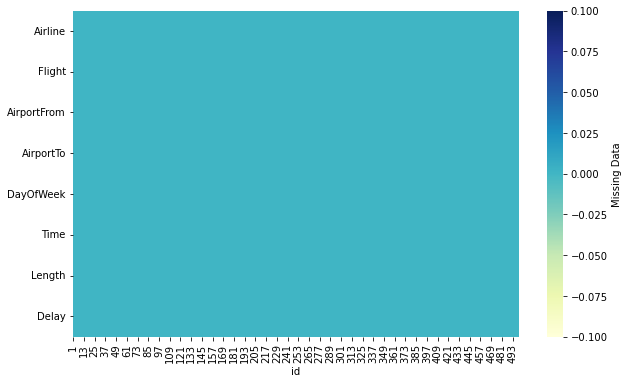

In [2]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

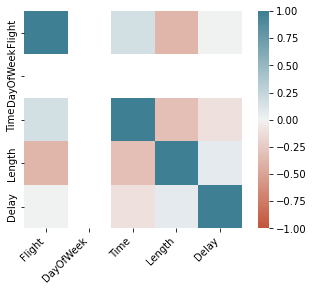

In [3]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## Data Preprocessing

In [4]:
df.drop(columns=["DayOfWeek","Flight"], inplace=True)

In [5]:
X = df.drop(columns="Delay")
y = df.Delay

#### Encoding Data Categoric

In [6]:
X = pd.get_dummies(data=X, columns=["Airline", "AirportFrom", "AirportTo"])

In [7]:
X.head()

,Time,Length,Airline_9E,Airline_AA,Airline_AS,Airline_B6,Airline_CO,Airline_DL,Airline_EV,Airline_F9,...,AirportTo_PHX,AirportTo_RDU,AirportTo_SAN,AirportTo_SEA,AirportTo_SFO,AirportTo_SJU,AirportTo_SLC,AirportTo_SMF,AirportTo_TYS,AirportTo_YUM
id,,,,,,,,,,,,,,,,,,,,,
1,15,205,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,222,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,20,165,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,195,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,30,202,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


#### Dataset splitting

In [8]:
X_shuffle = X.sample(frac=1)
y_shuffle = y.sample(frac=1)

# Komposisi data train sebesar 80% dan data test sebesar 20%
train_size = int(0.8 * len(X))

X_train = X_shuffle[:train_size]
X_test = X_shuffle[train_size:]
y_train = y_shuffle[:train_size]
y_test = y_shuffle[train_size:]

## Machine Learning Model Using Algorithm KNN

In [9]:
def minkowski_distance(a, b, p=1):
    
    dim = len(a)
    distance = 0
    
    for d in range(dim):
        distance += abs(a[d] - b[d])**p
        
    distance = distance**(1/p)
    
    return distance

In [10]:

def knn_predict(X_train, X_test, y_train, y_test, k, p):
    
    from collections import Counter
    
    
    y_hat_test = []

    for i in range (0, len(X_test)):
        distances = []

        for j in range (0, len(X_train)):
            distance = minkowski_distance(X_test.iloc[i], X_train.iloc[j], p=p)
            distances.append(distance)
        
        df_dists = pd.DataFrame(data=distances, columns=['dist'], 
                                index=y_train.index)
        
 
        df_nn = df_dists.sort_values(by=['dist'], axis=0)[:k]

        counter = Counter(y_train[df_nn.index])

        prediction = counter.most_common()[0][0]
        
        y_hat_test.append(prediction)
    
    
    return y_hat_test



In [12]:
y_predict = knn_predict(X_train, X_test, y_train, y_test, k=5, p=1)
y_predict

[0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0]

## Model Evaluation

In [23]:
#y_test = y_test.to_list()

#### Confusion Metrics

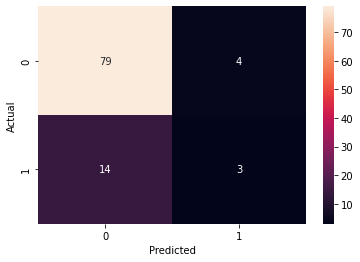

In [14]:
data = {'y_Actual':    y_test,
        'y_Predicted': y_predict
        }

daFrame = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(daFrame['y_Actual'], daFrame['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True)
plt.show()

#### Accuracy Model

In [19]:
def accuracy(a, b):
    dim = len(a)
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    
    for i in range(0, dim):
        if(a[i] == 0 and b[i] == 0):
            TN += 1
            
    for j in range(0, dim):
        if(a[j] == 1 and b[j] == 1):
            TP += 1
            
    for k in range(0, dim):
        if(a[k] == 1 and b[k] == 0):
            FN += 1
            
    for l in range(0, dim):
        if(a[l] == 0 and b[l] == 1):
            FP += 1
    
    result = (TN+TP)/(TN+TP+FN+FP)
    return result
            

In [20]:
accuracy(y_test, y_predict)

0.82